In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.graph_objects as go 
import plotly.express as px 

In [2]:
df=pd.read_csv("D:\\data\\playground.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [4]:
df.duplicated().sum()

0

In [5]:
# dropping cabin column 
df.drop(["Cabin"],axis=1,inplace=True)

In [6]:
df.drop(["Name","PassengerId"],axis=1,inplace=True)

In [9]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Survived,100000.0,NaN,NaN,NaN,0.42774,0.494753,0.0,0.0,0.0,1.0,1.0
Pclass,100000.0,NaN,NaN,NaN,2.10691,0.837727,1.0,1.0,2.0,3.0,3.0
Sex,100000,2,male,56114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,96708.0,NaN,NaN,NaN,38.355472,18.313556,0.08,25.0,39.0,53.0,87.0
SibSp,100000.0,NaN,NaN,NaN,0.39769,0.862566,0.0,0.0,0.0,1.0,8.0
Parch,100000.0,NaN,NaN,NaN,0.45456,0.950076,0.0,0.0,0.0,1.0,9.0
Ticket,95377,75331,A/5,602,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,99866.0,NaN,NaN,NaN,43.92933,69.58882,0.68,10.04,24.46,33.5,744.66
Embarked,99750,3,S,72139,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df["Survived"].value_counts()

0    57226
1    42774
Name: Survived, dtype: int64

In [10]:
df["SibSp"].value_counts()

0    73308
1    19758
2     3703
3     1635
4     1168
8      296
5      132
Name: SibSp, dtype: int64

In [25]:
pd.DataFrame(df).nunique()

Survived        2
Pclass          3
Sex             2
Age           173
SibSp           7
Parch           8
Ticket      75331
Fare        15935
Embarked        3
dtype: int64

In [12]:
df["Sex"].value_counts()

male      56114
female    43886
Name: Sex, dtype: int64

In [18]:
# pd.crosstab(df,columns=["Sex","Survived"])

In [29]:
df[["Sex","Survived"]].groupby(["Sex"]).value_counts()

Sex     Survived
female  1           31226
        0           12660
male    0           44566
        1           11548
dtype: int64

In [33]:
df[["Sex","Survived"]].groupby(["Sex"]).mean()

,Survived
Sex,
female,0.711525
male,0.205795


In [34]:
df[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean()

,Sex,Survived
0,female,0.711525
1,male,0.205795


In [37]:
df[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived")

,Sex,Survived
1,male,0.205795
0,female,0.711525


In [38]:
df[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.711525
1,male,0.205795


In [42]:
df[["Parch","Survived"]].groupby(["Parch"],as_index=False).mean()

,Parch,Survived
0,0,0.405208
1,1,0.592028
2,2,0.384745
3,3,0.492370
4,4,0.284753
5,5,0.570997
6,6,0.205882
7,9,0.439394


In [43]:
df[["Embarked","Survived"]].groupby(["Embarked"],as_index=False).mean()

,Embarked,Survived
0,C,0.751296
1,Q,0.596976
2,S,0.315294


In [44]:
df[["Embarked","Survived"]].groupby(["Survived"],as_index=False).mean()

C:\Users\visha\AppData\Local\Temp\ipykernel_12732\3033012583.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  df[["Embarked","Survived"]].groupby(["Survived"],as_index=False).mean()


,Survived
0,0
1,1


In [45]:
df.drop(["Ticket"],axis=1,inplace=True)

In [47]:
pd.crosstab(df['Embarked'],df["Survived"]).T

Embarked,C,Q,S
Survived,,,
0,5518,2186,49394
1,16669,3238,22745


In [49]:
fig=pd.crosstab(df["Sex"],df["Survived"])
fig

Survived,0,1
Sex,,
female,12660,31226
male,44566,11548


AttributeError: 'AxesSubplot' object has no attribute 'T'

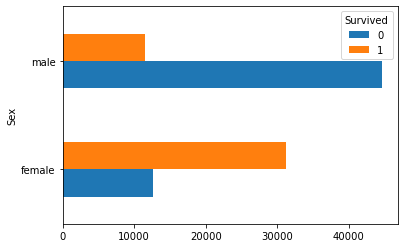

In [56]:
fig.plot(kind="barh")